# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\RAJESH\OneDrive\Desktop\Task_4\churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Cleaning Data

In [5]:
# Observe that all these Object columns have two values - Yes and No
df.loc[:, ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']]




,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [6]:
var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [7]:
df.select_dtypes(include='object')

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [8]:
df.TotalCharges.value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
5450.7      1
257         1
1299.8      1
1312.45     1
914         1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
# 
df.loc[df.TotalCharges == '', :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [12]:
df.shape

(7043, 21)

In [13]:
df = df.drop('customerID', axis=1)
df.shape

(7043, 20)

In [14]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [15]:
# Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [18]:
df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [19]:
df = df.drop(df_categorical.columns, axis=1)

In [20]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

In [22]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


In [24]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [25]:
df = df[~np.isnan(df['TotalCharges'])]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [27]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [28]:
df['Churn'].value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

### Under Sampling

In [29]:

# for undersampling we need a portion of majority class and will take whole data of minority class

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

yes = df.loc[df['Churn'] == 1]
no = df.loc[df['Churn'] == 0][:1869]

normal_distributed_df = pd.concat([yes, no])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
950,1,0,0,2,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6351,0,1,1,50,1,0,1,0,1,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5504,1,1,0,44,1,0,1,0,0,0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
499,0,0,0,12,1,1,1,1,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6943,0,1,1,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
new_df.shape

(3738, 25)

In [31]:
new_df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
y = new_df['Churn']
X = new_df.drop('Churn',axis = 1)

In [33]:
y.head()

950     1
6351    1
5504    1
499     1
6943    1
Name: Churn, dtype: int64

### Standardazation

In [34]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)

In [35]:
standardized_data.shape

(3738, 24)

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(standardized_data,y,train_size = 0.80,random_state = 0)

### LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7713903743315508

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


In [41]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1,0.1,0.01,10,100],'penalty':['l1','l2','elasticnet']}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


Best parameters set found on train set:
{'C': 100, 'penalty': 'l2', 'solver': 'sag'}
LogisticRegression(C=100, solver='sag')

0.7754010695187166
Best parameters set found on train set:
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=0.01, solver='newton-cg')

0.7655860349127181
Best parameters set found on train set:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=100, penalty='l1', solver='liblinear')

0.8071979434447301


In [42]:
con_metric = metrics.confusion_matrix(y_test,y_pred)
con_metric

array([[262,  97],
       [ 74, 315]], dtype=int64)

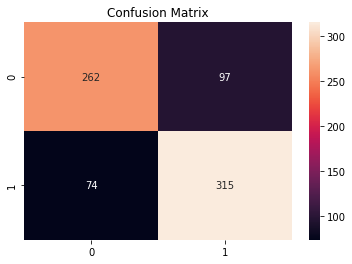

In [43]:
sns.heatmap(con_metric,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [45]:

y_pred = classifier.predict(X_test)

In [46]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7553475935828877

In [47]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[261,  98],
       [ 85, 304]], dtype=int64)

In [50]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = GridSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


Best parameters set found on train set:
{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')

0.7540106951871658
Best parameters set found on train set:
{'C': 1, 'gamma': 0.4694448036545408, 'kernel': 'rbf'}
SVC(C=1, gamma=0.4694448036545408)

0.7903225806451613
Best parameters set found on train set:
{'C': 1000, 'kernel': 'linear'}
SVC(C=1000, kernel='linear')

0.8123393316195373


In [51]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(X_test)


In [53]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7299465240641712

In [55]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()

0.7299465240641712
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4, p=1)

0.7454545454545455
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)

0.7763496143958869


In [56]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [57]:
y_test_pred = classifier.predict(X_test)


In [58]:
metrics.accuracy_score(y_test, y_test_pred)


0.7366310160427807

In [60]:

con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[203, 156],
       [ 41, 348]], dtype=int64)

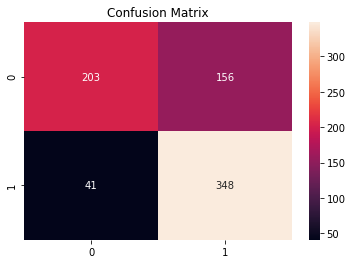

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [63]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'max_depth':[2,3,4,6,7,8,9,25]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

0.7072192513368984
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

0.7348066298342542
Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.8946015424164524


In [64]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [65]:
y_test_pred = classifier.predict(X_test)


In [66]:
metrics.accuracy_score(y_test, y_test_pred)


0.7620320855614974

In [67]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'n_estimators':[10,20,25,50,100]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_estimators': 100}
RandomForestClassifier()

0.7620320855614974
Best parameters set found on train set:
{'n_estimators': 100}
RandomForestClassifier()

0.7674418604651163
Best parameters set found on train set:
{'n_estimators': 25}
RandomForestClassifier(n_estimators=25)

0.7429305912596401


In [68]:

con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[257, 102],
       [ 76, 313]], dtype=int64)

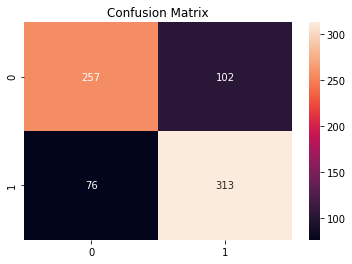

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
